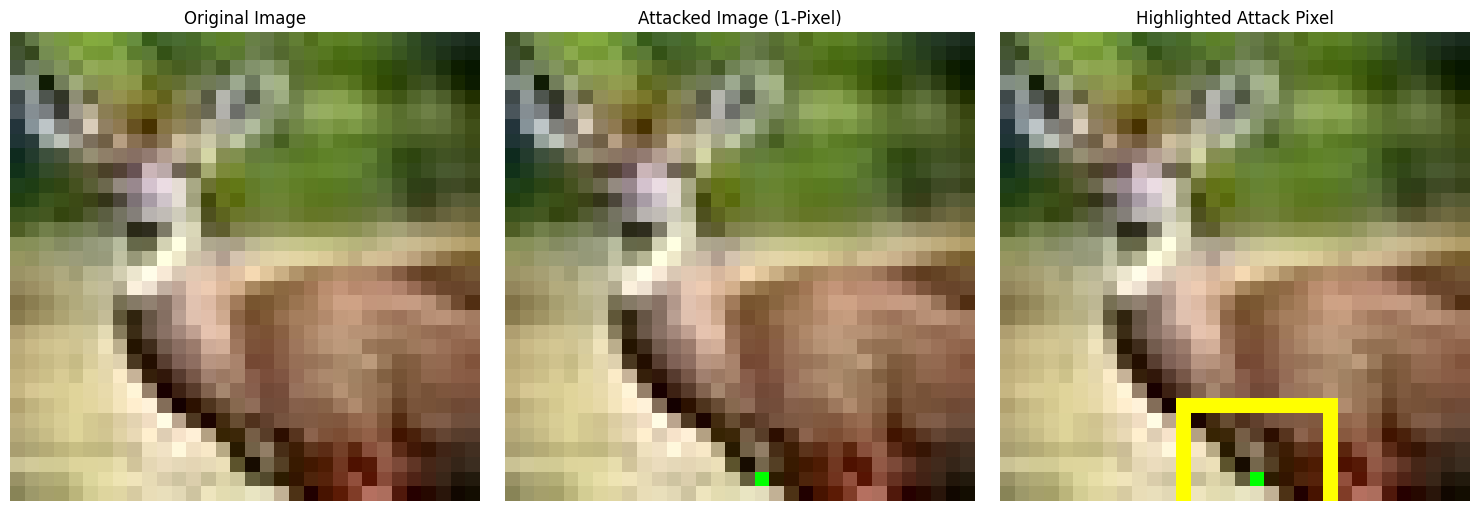

In [ ]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import random

# Load the image
image_path = "/content/train/FAKE/1001 (5).jpg"
original_image = Image.open(image_path)

image_array = np.array(original_image)

attacked_image_array = image_array.copy()

height, width, channels = image_array.shape

random_x = random.randint(0, height - 1)
random_y = random.randint(0, width - 1)

# Apply the one-pixel attack by modifying the pixel's RGB values
attacked_image_array[random_x, random_y] = [0, 255, 0]

# Highlight the attacked pixel in the attacked image
highlighted_image = Image.fromarray(attacked_image_array)
draw = ImageDraw.Draw(highlighted_image)
box_size = 5  # Box size for highlighting the pixel
bold_width = 1  # Thickness of the box outline

# Draw a bold rectangle
draw.rectangle(
    [
        (random_y - box_size, random_x - box_size),  # Top-left corner
        (random_y + box_size, random_x + box_size),  # Bottom-right corner
    ],
    outline="yellow",  # Color of the highlight
    width=bold_width,  # Thickness of the highlight
)

# Convert NumPy arrays back to images
attacked_image = Image.fromarray(attacked_image_array)

# Display the original, attacked, and highlighted images
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(original_image)
plt.axis("off")

# Attacked Image
plt.subplot(1, 3, 2)
plt.title("Attacked Image (1-Pixel)")
plt.imshow(attacked_image)
plt.axis("off")

# Highlighted Image
plt.subplot(1, 3, 3)
plt.title("Highlighted Attack Pixel")
plt.imshow(highlighted_image)
plt.axis("off")

plt.tight_layout()
plt.show()